# Import Library

In [ ]:
!pip install nltk
!pip install Sastrawi
!pip install scikit-learn
!pip install contractions
!pip install googletrans==3.1.0a0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=f060c7913212cdfdcfc6dac055dede241863d05834a6fcf386d488329a750e6d
  Stored 

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from googletrans import Translator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import contractions
import nltk
import numpy as np
import string
import re

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Import Data

## Data KBBI

In [ ]:
url_KBBI= 'https://drive.google.com/file/d/1oIbPBXrXMeQ42IttSfx_NAqhYNW_OiPz/view?usp=sharing'
url_KBBI = 'https://drive.google.com/uc?id=' + url_KBBI.split('/')[-2]

KBBI = pd.read_csv(url_KBBI)
KBBI = KBBI['0'].to_list()
KBBI[40:60]

['abah-abah kuda',
 'abah-abah perahu',
 'abah-abah tenun',
 'abahan',
 'abahui',
 'abai',
 'abaian',
 'abaimana',
 'abajang',
 'abak manang',
 'abaka',
 'abaksial',
 'abaktinal',
 'abakus',
 'abal',
 'abal-abal',
 'abalalu',
 'abalone',
 'abam',
 'abampere']

## Data Kamus Bahasa Inggris

In [ ]:
url_dict = 'https://drive.google.com/file/d/1LJcn2iOWhmm-hAsGtA2JLcbH7Nn0N8kP/view?usp=sharing'
url_dict = 'https://drive.google.com/uc?id=' + url_dict.split('/')[-2]

english_dict = pd.read_csv(url_dict)
english_dict = [str(word).lower() for word in english_dict['word'].unique()]
english_dict[:20]

['a',
 'a-',
 'a 1',
 'aam',
 'aard-vark',
 'aard-wolf',
 'aaronic',
 'aaronical',
 "aaron's rod",
 'ab-',
 'ab',
 'abaca',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abaction',
 'abactor']

## Data Scraping Comment IG

In [ ]:
# Mengambil data melalui URL
url = 'https://docs.google.com/spreadsheets/d/1pbhttK5Z9kNhhkiMddXA295jD8-95v-H/edit?usp=sharing&ouid=103893180789515944577&rtpof=true&sd=true'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df_ig = pd.read_excel(url)
df_ig

,Unnamed: 0,likesCount,owner/fbid_v2,owner/full_name,owner/id,owner/is_mentionable,owner/is_private,owner/is_verified,owner/latest_reel_media,owner/profile_pic_id,owner/profile_pic_url,owner/username,ownerProfilePicUrl,ownerUsername,postUrl,repliesCount,text,timestamp
0,18008783315194094,0,17841462620242268,️,62498159341,True,False,False,0.000000e+00,3.464033e+18,https://scontent-waw2-1.cdninstagram.com/v/t51...,cici.euyy11,https://scontent-waw2-1.cdninstagram.com/v/t51...,cici.euyy11,https://www.instagram.com/p/C2mY1PtLzES/,7,Pean itu mirip tmnku dlu yg krja d pabrik udan...,2024-01-27T10:31:16.000Z
1,18414020518036913,1,17841401668503546,Yus fahmi,1506999616,True,False,False,0.000000e+00,2.968525e+18,https://scontent-waw2-2.cdninstagram.com/v/t51...,yusglow,https://scontent-waw2-2.cdninstagram.com/v/t51...,yusglow,https://www.instagram.com/p/C2mY1PtLzES/,1,Wahh sangat informatif. Kebetulan kuotaku pas ...,2024-01-27T14:02:32.000Z
2,18056671906481034,1,17841429559494156,AREI STORE MADIUN 2,29633241316,True,False,False,1.731923e+09,3.143077e+18,https://scontent-waw2-2.cdninstagram.com/v/t51...,areistore_madiun2,https://scontent-waw2-2.cdninstagram.com/v/t51...,areistore_madiun2,https://www.instagram.com/p/C2mY1PtLzES/,0,Hallooo teman-teman jangan lupa lengkapi kebut...,2024-02-09T07:39:56.000Z
3,18003114023141966,1,17841406841543096,azmi_,6824764051,True,True,False,NaN,3.387058e+18,https://scontent-waw2-2.cdninstagram.com/v/t51...,azmiintan_,https://scontent-waw2-2.cdninstagram.com/v/t51...,azmiintan_,https://www.instagram.com/p/C2mY1PtLzES/,5,Waahh spil dong kak sg ada privat room e,2024-01-27T10:24:54.000Z
4,18312273493133431,0,17841400682644240,Mas Plenthing,1551318754,True,True,False,NaN,3.458465e+18,https://scontent-waw2-2.cdninstagram.com/v/t51...,masplenthingg,https://scontent-waw2-2.cdninstagram.com/v/t51...,masplenthingg,https://www.instagram.com/p/C2mY1PtLzES/,1,keren kakk.. mau dong diajakin muter²..,2024-01-27T15:16:13.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,18099473575465515,0,17841453584516492,Moklison Senyum,53651938150,True,False,False,0.000000e+00,2.863172e+18,https://scontent-fra5-2.cdninstagram.com/v/t51...,moklisons,https://scontent-fra5-2.cdninstagram.com/v/t51...,moklisons,https://www.instagram.com/p/DCV5ZmhJ18J/,0,Tiap hari laku,2024-11-14T07:06:03.000Z
651,18028404854183036,1,17841449271201110,NaN,49288882373,True,False,False,0.000000e+00,3.390046e+18,https://scontent-fra5-1.cdninstagram.com/v/t51...,cand_setiawan,https://scontent-fra5-1.cdninstagram.com/v/t51...,cand_setiawan,https://www.instagram.com/p/DCV5ZmhJ18J/,0,Mahal2 kuotanya.. bagi menengah ke bawah...,2024-11-17T03:02:24.000Z
652,17946012680869491,0,17841405546149860,Lhuluk Zuhryah,5678888871,True,False,False,1.731978e+09,2.753503e+18,https://scontent-fra3-1.cdninstagram.com/v/t51...,lhulukzuhryah,https://scontent-fra3-1.cdninstagram.com/v/t51...,lhulukzuhryah,https://www.instagram.com/p/DCeZms6yRgv/?img_i...,0,Wkwkwkwk PD aja deh pokoknya,2024-11-17T14:19:02.000Z
653,18068615140646439,0,17841403492431496,Hamzah,3451972414,True,False,False,0.000000e+00,3.460656e+18,https://scontent-fra5-2.cdninstagram.com/v/t51...,hamzah_vanzuri,https://scontent-fra5-2.cdninstagram.com/v/t51...,hamzah_vanzuri,https://www.instagram.com/p/DCf8bpwMYz1/,0,Sinyal Kontol Lemot Indosat,2024-11-18T19:14:05.000Z


## Data Scraping Comment TikTok

In [ ]:
# Mengambil data melalui URL
url_tiktok = 'https://docs.google.com/spreadsheets/d/1FH8njlLuo8yY4GGDieNzDK-NPHYLue0B/edit?usp=sharing&ouid=103893180789515944577&rtpof=true&sd=true'
url_tiktok = 'https://drive.google.com/uc?id=' + url_tiktok.split('/')[-2]

df_tiktok = pd.read_excel(url_tiktok)
df_tiktok

,avatarThumbnail,cid,createTime,createTimeISO,diggCount,repliesToId,replyCommentTotal,submittedVideoUrl,text,uid,uniqueId,videoWebUrl
0,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7347555750380897029,1710736154,2024-03-18T04:29:14.000Z,0,NaN,0.0,https://www.tiktok.com/@im3.jawatimur/video/73...,@sayjuwa @strawberryflyyyy5,6834120141291586562,favorwishes,https://www.tiktok.com/@im3.jawatimur/video/73...
1,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,7379450638810645254,1718162260,2024-06-12T03:17:40.000Z,0,NaN,0.0,https://www.tiktok.com/@im3.jawatimur/video/73...,NaN,6906343632208774146,milikkitaw,https://www.tiktok.com/@im3.jawatimur/video/73...
2,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,7379450595529114374,1718162246,2024-06-12T03:17:26.000Z,0,NaN,0.0,https://www.tiktok.com/@im3.jawatimur/video/73...,NaN,6906343632208774146,milikkitaw,https://www.tiktok.com/@im3.jawatimur/video/73...
3,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,7372082910915166981,1716446831,2024-05-23T06:47:11.000Z,1,NaN,0.0,https://www.tiktok.com/@im3.jawatimur/video/73...,"waalaikum slm, lancar komunikasi",7141385735567229953,sriwahyu3485,https://www.tiktok.com/@im3.jawatimur/video/73...
4,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7372179805686743814,1716469378,2024-05-23T13:02:58.000Z,1,NaN,0.0,https://www.tiktok.com/@im3.jawatimur/video/73...,NaN,6938653951882970113,mamysulin,https://www.tiktok.com/@im3.jawatimur/video/73...
...,...,...,...,...,...,...,...,...,...,...,...,...
198,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7437589133805044481,1731704491,2024-11-15T21:01:31.000Z,0,NaN,0.0,https://www.tiktok.com/@im3.jawatimur/video/74...,NaN,7387842304683852806,arya.gray02,https://www.tiktok.com/@im3.jawatimur/video/74...
199,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7437858786666218296,1731761460,2024-11-16T12:51:00.000Z,1,NaN,0.0,https://www.tiktok.com/@im3.jawatimur/video/74...,tebak yg tantrum,6896408099113452545,larayass,https://www.tiktok.com/@im3.jawatimur/video/74...
200,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7439151314317280055,1732062406,2024-11-20T00:26:46.000Z,1,NaN,0.0,https://www.tiktok.com/@im3.jawatimur/video/74...,nyari pahala,7046033331951354881,userkbp68tr8lq,https://www.tiktok.com/@im3.jawatimur/video/74...
201,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,7439261148271412023,1732088003,2024-11-20T07:33:23.000Z,1,NaN,0.0,https://www.tiktok.com/@im3.jawatimur/video/74...,"""besok ada pr ga ya"" ""au ah gapeduli""",7356771052738020358,zeeroicc,https://www.tiktok.com/@im3.jawatimur/video/74...


# Data Preprocessing

## Menghapus Kolom yang Tidak Digunakan

### Instagram

In [ ]:
data_ig = df_ig.drop(columns=['likesCount', 'owner/fbid_v2', 'owner/full_name', 'owner/id', 'owner/is_mentionable', 'owner/is_private', 'owner/is_verified', 'owner/latest_reel_media',
                              'owner/profile_pic_id', 'owner/profile_pic_url', 'ownerProfilePicUrl', 'owner/username', 'postUrl', 'repliesCount'])
data_ig

,Unnamed: 0,ownerUsername,text,timestamp
0,18008783315194094,cici.euyy11,Pean itu mirip tmnku dlu yg krja d pabrik udan...,2024-01-27T10:31:16.000Z
1,18414020518036913,yusglow,Wahh sangat informatif. Kebetulan kuotaku pas ...,2024-01-27T14:02:32.000Z
2,18056671906481034,areistore_madiun2,Hallooo teman-teman jangan lupa lengkapi kebut...,2024-02-09T07:39:56.000Z
3,18003114023141966,azmiintan_,Waahh spil dong kak sg ada privat room e,2024-01-27T10:24:54.000Z
4,18312273493133431,masplenthingg,keren kakk.. mau dong diajakin muter²..,2024-01-27T15:16:13.000Z
...,...,...,...,...
650,18099473575465515,moklisons,Tiap hari laku,2024-11-14T07:06:03.000Z
651,18028404854183036,cand_setiawan,Mahal2 kuotanya.. bagi menengah ke bawah...,2024-11-17T03:02:24.000Z
652,17946012680869491,lhulukzuhryah,Wkwkwkwk PD aja deh pokoknya,2024-11-17T14:19:02.000Z
653,18068615140646439,hamzah_vanzuri,Sinyal Kontol Lemot Indosat,2024-11-18T19:14:05.000Z


In [ ]:
data_ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     655 non-null    int64 
 1   ownerUsername  655 non-null    object
 2   text           479 non-null    object
 3   timestamp      655 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.6+ KB


### TikTok

In [ ]:
data_tiktok = df_tiktok.drop(columns=['avatarThumbnail', 'createTime', 'diggCount', 'repliesToId', 'replyCommentTotal', 'submittedVideoUrl', 'uid', 'videoWebUrl'])
data_tiktok

,cid,createTimeISO,text,uniqueId
0,7347555750380897029,2024-03-18T04:29:14.000Z,@sayjuwa @strawberryflyyyy5,favorwishes
1,7379450638810645254,2024-06-12T03:17:40.000Z,NaN,milikkitaw
2,7379450595529114374,2024-06-12T03:17:26.000Z,NaN,milikkitaw
3,7372082910915166981,2024-05-23T06:47:11.000Z,"waalaikum slm, lancar komunikasi",sriwahyu3485
4,7372179805686743814,2024-05-23T13:02:58.000Z,NaN,mamysulin
...,...,...,...,...
198,7437589133805044481,2024-11-15T21:01:31.000Z,NaN,arya.gray02
199,7437858786666218296,2024-11-16T12:51:00.000Z,tebak yg tantrum,larayass
200,7439151314317280055,2024-11-20T00:26:46.000Z,nyari pahala,userkbp68tr8lq
201,7439261148271412023,2024-11-20T07:33:23.000Z,"""besok ada pr ga ya"" ""au ah gapeduli""",zeeroicc


In [ ]:
df_tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avatarThumbnail    203 non-null    object 
 1   cid                203 non-null    int64  
 2   createTime         203 non-null    int64  
 3   createTimeISO      203 non-null    object 
 4   diggCount          203 non-null    int64  
 5   repliesToId        11 non-null     float64
 6   replyCommentTotal  192 non-null    float64
 7   submittedVideoUrl  203 non-null    object 
 8   text               141 non-null    object 
 9   uid                203 non-null    int64  
 10  uniqueId           203 non-null    object 
 11  videoWebUrl        203 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 19.2+ KB


## Menghapus Kolom Kosong

### Instagram

In [ ]:
data_ig.isna().sum()

,0
Unnamed: 0,0
ownerUsername,0
text,0
timestamp,0


In [ ]:
data_ig.dropna(inplace=True)

In [ ]:
data_ig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 0 to 653
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     479 non-null    object
 1   ownerUsername  479 non-null    object
 2   text           479 non-null    object
 3   timestamp      479 non-null    object
dtypes: object(4)
memory usage: 34.9+ KB


### TikTok

In [ ]:
data_tiktok.isna().sum()

,0
cid,0
createTimeISO,0
text,62
uniqueId,0


In [ ]:
data_tiktok.dropna(inplace=True)

In [ ]:
data_tiktok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 201
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cid            141 non-null    int64 
 1   createTimeISO  141 non-null    object
 2   text           141 non-null    object
 3   uniqueId       141 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.5+ KB


## Mengubah Nama Kolom

### Instagram

In [ ]:
data_ig.columns = ['ID', 'Username', 'Comment', 'Tanggal']
data_ig.columns

Index(['ID', 'Username', 'Comment', 'Tanggal'], dtype='object')

### Tiktok

In [ ]:
data_tiktok.columns = ['ID', 'Tanggal', 'Comment', 'Username']
data_tiktok.columns

Index(['ID', 'Tanggal', 'Comment', 'Username'], dtype='object')

In [ ]:
data_tiktok = data_tiktok[['ID', 'Username', 'Comment', 'Tanggal']]
data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,@sayjuwa @strawberryflyyyy5,2024-03-18T04:29:14.000Z
3,7372082910915166981,sriwahyu3485,"waalaikum slm, lancar komunikasi",2024-05-23T06:47:11.000Z
7,7372157544092074757,riskha.ajha,Allahuakbar,2024-05-23T11:36:43.000Z
9,7374305475654304517,buayameragh,13 rb axis 9 gb,2024-05-29T06:31:50.000Z
10,7376515114004316934,im3.jawatimur,"halo kak, boleh di tengok dulu di myIM3. Coba ...",2024-06-04T05:26:15.000Z
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,sampai kapan min poromonya,2024-11-15T09:09:29.000Z
197,7437409774293975826,hanz_cii,Hai min,2024-11-15T07:48:34.000Z
199,7437858786666218296,larayass,tebak yg tantrum,2024-11-16T12:51:00.000Z
200,7439151314317280055,userkbp68tr8lq,nyari pahala,2024-11-20T00:26:46.000Z


## Mengubah Format Tanggal

### Instagram

In [ ]:
data_ig['Tanggal'] = pd.to_datetime(data_ig['Tanggal']).dt.date
data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,Pean itu mirip tmnku dlu yg krja d pabrik udan...,2024-01-27
1,18414020518036913,yusglow,Wahh sangat informatif. Kebetulan kuotaku pas ...,2024-01-27
2,18056671906481034,areistore_madiun2,Hallooo teman-teman jangan lupa lengkapi kebut...,2024-02-09
3,18003114023141966,azmiintan_,Waahh spil dong kak sg ada privat room e,2024-01-27
4,18312273493133431,masplenthingg,keren kakk.. mau dong diajakin muter..,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,Hhh,2024-11-16
650,18099473575465515,moklisons,Tiap hari laku,2024-11-14
651,18028404854183036,cand_setiawan,Mahal2 kuotanya.. bagi menengah ke bawah...,2024-11-17
652,17946012680869491,lhulukzuhryah,Wkwkwkwk PD aja deh pokoknya,2024-11-17


### TikTok

In [ ]:
data_tiktok['Tanggal'] = pd.to_datetime(data_tiktok['Tanggal']).dt.date
data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,@sayjuwa @strawberryflyyyy5,2024-03-18
3,7372082910915166981,sriwahyu3485,"waalaikum slm, lancar komunikasi",2024-05-23
7,7372157544092074757,riskha.ajha,Allahuakbar,2024-05-23
9,7374305475654304517,buayameragh,13 rb axis 9 gb,2024-05-29
10,7376515114004316934,im3.jawatimur,"halo kak, boleh di tengok dulu di myIM3. Coba ...",2024-06-04
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,sampai kapan min poromonya,2024-11-15
197,7437409774293975826,hanz_cii,Hai min,2024-11-15
199,7437858786666218296,larayass,tebak yg tantrum,2024-11-16
200,7439151314317280055,userkbp68tr8lq,nyari pahala,2024-11-20


## Text Cleaning

### Menghapus Username dan Tautan pada Comment

In [ ]:
def remove_usernames_links(comment):
    comment = re.sub('@[^\s]+','',comment)
    comment = re.sub('http[^\s]+','',comment)
    return comment

#### Instagram



In [ ]:
data_ig['Comment'] = data_ig['Comment'].apply(remove_usernames_links)

data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,Pean itu mirip tmnku dlu yg krja d pabrik udan...,2024-01-27
1,18414020518036913,yusglow,Wahh sangat informatif. Kebetulan kuotaku pas ...,2024-01-27
2,18056671906481034,areistore_madiun2,Hallooo teman-teman jangan lupa lengkapi kebut...,2024-02-09
3,18003114023141966,azmiintan_,Waahh spil dong kak sg ada privat room e,2024-01-27
4,18312273493133431,masplenthingg,keren kakk.. mau dong diajakin muter..,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,Hhh,2024-11-16
650,18099473575465515,moklisons,Tiap hari laku,2024-11-14
651,18028404854183036,cand_setiawan,Mahal2 kuotanya.. bagi menengah ke bawah...,2024-11-17
652,17946012680869491,lhulukzuhryah,Wkwkwkwk PD aja deh pokoknya,2024-11-17


#### TikTok

In [ ]:
data_tiktok['Comment'] = data_tiktok['Comment'].apply(remove_usernames_links)

data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,,2024-03-18
3,7372082910915166981,sriwahyu3485,"waalaikum slm, lancar komunikasi",2024-05-23
7,7372157544092074757,riskha.ajha,Allahuakbar,2024-05-23
9,7374305475654304517,buayameragh,13 rb axis 9 gb,2024-05-29
10,7376515114004316934,im3.jawatimur,"halo kak, boleh di tengok dulu di myIM3. Coba ...",2024-06-04
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,sampai kapan min poromonya,2024-11-15
197,7437409774293975826,hanz_cii,Hai min,2024-11-15
199,7437858786666218296,larayass,tebak yg tantrum,2024-11-16
200,7439151314317280055,userkbp68tr8lq,nyari pahala,2024-11-20


### Menghapus Emoji pada Comment

#### Instagram

In [ ]:
data_ig = data_ig.astype(str).apply(
    lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')
)

data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,Pean itu mirip tmnku dlu yg krja d pabrik udan...,2024-01-27
1,18414020518036913,yusglow,Wahh sangat informatif. Kebetulan kuotaku pas ...,2024-01-27
2,18056671906481034,areistore_madiun2,Hallooo teman-teman jangan lupa lengkapi kebut...,2024-02-09
3,18003114023141966,azmiintan_,Waahh spil dong kak sg ada privat room e,2024-01-27
4,18312273493133431,masplenthingg,keren kakk.. mau dong diajakin muter..,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,Hhh,2024-11-16
650,18099473575465515,moklisons,Tiap hari laku,2024-11-14
651,18028404854183036,cand_setiawan,Mahal2 kuotanya.. bagi menengah ke bawah...,2024-11-17
652,17946012680869491,lhulukzuhryah,Wkwkwkwk PD aja deh pokoknya,2024-11-17


#### TikTok

In [ ]:
data_tiktok = data_tiktok.astype(str).apply(
    lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')
)

data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,,2024-03-18
3,7372082910915166981,sriwahyu3485,"waalaikum slm, lancar komunikasi",2024-05-23
7,7372157544092074757,riskha.ajha,Allahuakbar,2024-05-23
9,7374305475654304517,buayameragh,13 rb axis 9 gb,2024-05-29
10,7376515114004316934,im3.jawatimur,"halo kak, boleh di tengok dulu di myIM3. Coba ...",2024-06-04
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,sampai kapan min poromonya,2024-11-15
197,7437409774293975826,hanz_cii,Hai min,2024-11-15
199,7437858786666218296,larayass,tebak yg tantrum,2024-11-16
200,7439151314317280055,userkbp68tr8lq,nyari pahala,2024-11-20


### Mengatasi Bahasa Gaul Menggunakan Translasi Google

In [ ]:
def remove_slang_words(text: str):
    translator = Translator()
    translation = translator.translate(text, dest='en', src='id')
    translation = translator.translate(translation.text, dest='id', src='en')
    return translation.text

#### Instagram

In [ ]:
data_ig['Comment'] = data_ig['Comment'].apply(remove_slang_words)
data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,Pean mirip dengan teman saya yang bekerja di p...,2024-01-27
1,18414020518036913,yusglow,"Wah, informatif sekali. Kebetulan kuota saya j...",2024-01-27
2,18056671906481034,areistore_madiun2,Hallo sob jangan lupa lengkapi kebutuhan outdo...,2024-02-09
3,18003114023141966,azmiintan_,"Wah keren banget gan, ada private roomnya e",2024-01-27
4,18312273493133431,masplenthingg,keren kawan.. maukah kamu bermain denganku..,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,Mendesah,2024-11-16
650,18099473575465515,moklisons,Setiap hari terjual,2024-11-14
651,18028404854183036,cand_setiawan,Kuotanya mahal...untuk kalangan menengah ke ba...,2024-11-17
652,17946012680869491,lhulukzuhryah,"Wkwkwkwk, PD saja, itu saja",2024-11-17


#### TikTok

In [ ]:
data_tiktok['Comment'] = data_tiktok['Comment'].apply(remove_slang_words)
data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,,2024-03-18
3,7372082910915166981,sriwahyu3485,"waalaikum semoga sukses, lancar komunikasinya",2024-05-23
7,7372157544092074757,riskha.ajha,Allah Maha Besar,2024-05-23
9,7374305475654304517,buayameragh,Sumbu 13K 9GB,2024-05-29
10,7376515114004316934,im3.jawatimur,"halo kak, boleh lihat myIM3 dulu? Coba dulu, s...",2024-06-04
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,berapa lama poromonya?,2024-11-15
197,7437409774293975826,hanz_cii,Hai min,2024-11-15
199,7437858786666218296,larayass,Tebak siapa yang sedang mengamuk,2024-11-16
200,7439151314317280055,userkbp68tr8lq,mendapatkan imbalan,2024-11-20


### Membersihkan Comment

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab', download_dir='/content/nltk_data')
nltk.data.path.append('/content/nltk_data')

[nltk_data] Downloading package punkt_tab to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Function untuk membersihkan text
def text_cleaning(data: str):
    data = [contractions.fix(word) for word in data.split()]
    data = ' '.join([(l) for l in data])
    data = word_tokenize(data)
    data = [word.lower() for word in data]
    punctuations = string.punctuation
    data = [word for word in data if word not in punctuations]
    data = ' '.join([(l) for l in data])
    data = data.replace('`` ', '')
    data = data.replace('`', '')

    return data

#### Instagram

In [ ]:
data_ig['Comment'] = data_ig['Comment'].apply(text_cleaning)
data_ig['Comment'] = data_ig['Comment'].str.replace('... ', '')
data_ig['Comment'] = data_ig['Comment'].str.replace('.. ', '')
data_ig['Comment'] = data_ig['Comment'].str.replace('. ', '')
data_ig['Comment'] = data_ig['Comment'].str.replace('.', '')
data_ig['Comment'] = data_ig['Comment'].str.replace('-', '')
data_ig['Comment'] = data_ig['Comment'].replace('\d+', '', regex=True)

data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,pean mirip dengan teman saya yang bekerja di p...,2024-01-27
1,18414020518036913,yusglow,wah informatif sekali kebetulan kuota saya jug...,2024-01-27
2,18056671906481034,areistore_madiun2,hallo sob jangan lupa lengkapi kebutuhan outdo...,2024-02-09
3,18003114023141966,azmiintan_,wah keren banget gan ada private roomnya e,2024-01-27
4,18312273493133431,masplenthingg,keren kawan maukah kamu bermain denganku,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,mendesah,2024-11-16
650,18099473575465515,moklisons,setiap hari terjual,2024-11-14
651,18028404854183036,cand_setiawan,kuotanya mahal untuk kalangan menengah ke bawah,2024-11-17
652,17946012680869491,lhulukzuhryah,wkwkwkwk pd saja itu saja,2024-11-17


#### TikTok

In [ ]:
data_tiktok['Comment'] = data_tiktok['Comment'].apply(text_cleaning)
data_tiktok['Comment'] = data_tiktok['Comment'].str.replace('... ', '')
data_tiktok['Comment'] = data_tiktok['Comment'].str.replace('.. ', '')
data_tiktok['Comment'] = data_tiktok['Comment'].str.replace('. ', '')
data_tiktok['Comment'] = data_tiktok['Comment'].str.replace('.', '')
data_tiktok['Comment'] = data_tiktok['Comment'].str.replace('-', '')
data_tiktok['Comment'] = data_tiktok['Comment'].replace('\d+', '', regex=True)

data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,,2024-03-18
3,7372082910915166981,sriwahyu3485,waalaikum semoga sukses lancar komunikasinya,2024-05-23
7,7372157544092074757,riskha.ajha,allah maha besar,2024-05-23
9,7374305475654304517,buayameragh,sumbu k gb,2024-05-29
10,7376515114004316934,im3.jawatimur,halo kak boleh lihat myim dulu coba dulu siapa...,2024-06-04
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,berapa lama poromonya,2024-11-15
197,7437409774293975826,hanz_cii,hai min,2024-11-15
199,7437858786666218296,larayass,tebak siapa yang sedang mengamuk,2024-11-16
200,7439151314317280055,userkbp68tr8lq,mendapatkan imbalan,2024-11-20


### Menghapus Imbuhan pada Comment

In [ ]:
# Function untuk memotong kata menjadi singkat
def stemming(data: str):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)

    return data

#### Instagram

In [ ]:
data_ig['Comment'] = data_ig['Comment'].apply(stemming)
data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,pean mirip dengan teman saya yang kerja di pab...,2024-01-27
1,18414020518036913,yusglow,wah informatif sekali betul kuota saya juga pa...,2024-01-27
2,18056671906481034,areistore_madiun2,hallo sob jangan lupa lengkap butuh outdoor ka...,2024-02-09
3,18003114023141966,azmiintan_,wah keren banget gan ada private roomnya e,2024-01-27
4,18312273493133431,masplenthingg,keren kawan mau kamu main dengan,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,desah,2024-11-16
650,18099473575465515,moklisons,tiap hari jual,2024-11-14
651,18028404854183036,cand_setiawan,kuota mahal untuk kalang tengah ke bawah,2024-11-17
652,17946012680869491,lhulukzuhryah,wkwkwkwk pd saja itu saja,2024-11-17


#### TikTok

In [ ]:
data_tiktok['Comment'] = data_tiktok['Comment'].apply(stemming)
data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,,2024-03-18
3,7372082910915166981,sriwahyu3485,waalaikum moga sukses lancar komunikasi,2024-05-23
7,7372157544092074757,riskha.ajha,allah maha besar,2024-05-23
9,7374305475654304517,buayameragh,sumbu k gb,2024-05-29
10,7376515114004316934,im3.jawatimur,halo kak boleh lihat myim dulu coba dulu siapa...,2024-06-04
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,berapa lama poromonya,2024-11-15
197,7437409774293975826,hanz_cii,hai min,2024-11-15
199,7437858786666218296,larayass,tebak siapa yang sedang amuk,2024-11-16
200,7439151314317280055,userkbp68tr8lq,dapat imbal,2024-11-20


### Menghapus Stopword

In [ ]:
# Function untuk menghapus kata stop word
def no_stopwords(data: str, tambahan: set = {}):
    data = word_tokenize(data)
    stop_words_id = set(stopwords.words('indonesian'))
    stop_words_en = set(stopwords.words('english'))
    stop_words = stop_words_id.union(stop_words_en)
    stop_words = stop_words.union(tambahan)
    data = [word for word in data if word not in stop_words]
    data = ' '.join([(l) for l in data])
    data = data.replace('`` ', '')
    data = data.replace('`', '')

    return data

#### Instagram

In [ ]:
tambahan = {'min', 'admin', 'ya'}
data_ig['Comment'] = data_ig['Comment'].apply(lambda x: no_stopwords(x, tambahan))
data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,pean teman kerja pabrik udang sidoarjo,2024-01-27
1,18414020518036913,yusglow,informatif kuota pas,2024-01-27
2,18056671906481034,areistore_madiun2,hallo sob lupa lengkap butuh outdoor outdoor g...,2024-02-09
3,18003114023141966,azmiintan_,keren banget gan private roomnya e,2024-01-27
4,18312273493133431,masplenthingg,keren kawan main,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,desah,2024-11-16
650,18099473575465515,moklisons,jual,2024-11-14
651,18028404854183036,cand_setiawan,kuota mahal kalang,2024-11-17
652,17946012680869491,lhulukzuhryah,wkwkwkwk pd,2024-11-17


#### TikTok

In [ ]:
tambahan = {'min', 'admin', 'ya'}
data_tiktok['Comment'] = data_tiktok['Comment'].apply(lambda x: no_stopwords(x, tambahan))
data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,,2024-03-18
3,7372082910915166981,sriwahyu3485,waalaikum moga sukses lancar komunikasi,2024-05-23
7,7372157544092074757,riskha.ajha,allah maha,2024-05-23
9,7374305475654304517,buayameragh,sumbu k gb,2024-05-29
10,7376515114004316934,im3.jawatimur,halo kak lihat myim coba suka,2024-06-04
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,poromonya,2024-11-15
197,7437409774293975826,hanz_cii,hai,2024-11-15
199,7437858786666218296,larayass,tebak amuk,2024-11-16
200,7439151314317280055,userkbp68tr8lq,imbal,2024-11-20


### Menghapus Non Kata

In [ ]:
def hapus_huruf(data: str):
    data_token = word_tokenize(data)

    data_bersih = list()

    for kata in data_token:
        if len(kata) > 1:
            data_bersih.append(kata)
        else:
            continue

    data_string = ' '.join([(l) for l in data_bersih])
    return data_string

#### Instagram

In [ ]:
data_ig['Comment'] = data_ig['Comment'].apply(hapus_huruf)
data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,pean teman kerja pabrik udang sidoarjo,2024-01-27
1,18414020518036913,yusglow,informatif kuota pas,2024-01-27
2,18056671906481034,areistore_madiun2,hallo sob lupa lengkap butuh outdoor outdoor g...,2024-02-09
3,18003114023141966,azmiintan_,keren banget gan private roomnya,2024-01-27
4,18312273493133431,masplenthingg,keren kawan main,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,desah,2024-11-16
650,18099473575465515,moklisons,jual,2024-11-14
651,18028404854183036,cand_setiawan,kuota mahal kalang,2024-11-17
652,17946012680869491,lhulukzuhryah,wkwkwkwk pd,2024-11-17


#### TikTok

In [ ]:
data_tiktok['Comment'] = data_tiktok['Comment'].apply(hapus_huruf)
data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,,2024-03-18
3,7372082910915166981,sriwahyu3485,waalaikum moga sukses lancar komunikasi,2024-05-23
7,7372157544092074757,riskha.ajha,allah maha,2024-05-23
9,7374305475654304517,buayameragh,sumbu gb,2024-05-29
10,7376515114004316934,im3.jawatimur,halo kak lihat myim coba suka,2024-06-04
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,poromonya,2024-11-15
197,7437409774293975826,hanz_cii,hai,2024-11-15
199,7437858786666218296,larayass,tebak amuk,2024-11-16
200,7439151314317280055,userkbp68tr8lq,imbal,2024-11-20


### Menghapus di Luar Kamus

In [ ]:
def kamus_only(data: str):
    data_token = word_tokenize(data)

    data_bersih = list()

    for kata in data_token:
        if kata in KBBI or kata in english_dict:
            data_bersih.append(kata)
        else:
            continue

    data_string = ' '.join([(l) for l in data_bersih])
    return data_string

#### Instagram

In [ ]:
data_ig['Comment'] = data_ig['Comment'].apply(kamus_only)
data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,pean teman kerja pabrik udang sidoarjo,2024-01-27
1,18414020518036913,yusglow,informatif kuota pas,2024-01-27
2,18056671906481034,areistore_madiun2,sob lupa lengkap butuh outdoor outdoor gear di...,2024-02-09
3,18003114023141966,azmiintan_,keren banget gan private,2024-01-27
4,18312273493133431,masplenthingg,keren kawan main,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,desah,2024-11-16
650,18099473575465515,moklisons,jual,2024-11-14
651,18028404854183036,cand_setiawan,kuota mahal kalang,2024-11-17
652,17946012680869491,lhulukzuhryah,pd,2024-11-17


#### TikTok

In [ ]:
data_tiktok['Comment'] = data_tiktok['Comment'].apply(kamus_only)
data_tiktok

,ID,Username,Comment,Tanggal
0,7347555750380897029,favorwishes,,2024-03-18
3,7372082910915166981,sriwahyu3485,moga sukses lancar komunikasi,2024-05-23
7,7372157544092074757,riskha.ajha,allah maha,2024-05-23
9,7374305475654304517,buayameragh,sumbu,2024-05-29
10,7376515114004316934,im3.jawatimur,halo kak lihat coba suka,2024-06-04
...,...,...,...,...
196,7437430645296595720,_waapunyioo_,,2024-11-15
197,7437409774293975826,hanz_cii,hai,2024-11-15
199,7437858786666218296,larayass,tebak amuk,2024-11-16
200,7439151314317280055,userkbp68tr8lq,imbal,2024-11-20


## Menghapus Baris Kosong

### Instagram

In [ ]:
data_ig.isna().sum()

,0
ID,0
Username,0
Comment,0
Tanggal,0


In [ ]:
data_ig['Comment'].replace('', np.nan, inplace=True)
print(data_ig.isna().sum())
data_ig.dropna(inplace=True)

ID            0
Username      0
Comment     104
Tanggal       0
dtype: int64


<ipython-input-90-f2d7785537ed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_ig['Comment'].replace('', np.nan, inplace=True)


In [ ]:
data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,pean teman kerja pabrik udang sidoarjo,2024-01-27
1,18414020518036913,yusglow,informatif kuota pas,2024-01-27
2,18056671906481034,areistore_madiun2,sob lupa lengkap butuh outdoor outdoor gear di...,2024-02-09
3,18003114023141966,azmiintan_,keren banget gan private,2024-01-27
4,18312273493133431,masplenthingg,keren kawan main,2024-01-27
...,...,...,...,...
649,18307983313165990,apokpak_234,desah,2024-11-16
650,18099473575465515,moklisons,jual,2024-11-14
651,18028404854183036,cand_setiawan,kuota mahal kalang,2024-11-17
652,17946012680869491,lhulukzuhryah,pd,2024-11-17


### TikTok

In [ ]:
data_tiktok.isna().sum()

,0
ID,0
Username,0
Comment,0
Tanggal,0


In [ ]:
data_tiktok['Comment'].replace('', np.nan, inplace=True)
print(data_tiktok.isna().sum())
data_tiktok.dropna(inplace=True)

ID           0
Username     0
Comment     24
Tanggal      0
dtype: int64


<ipython-input-93-9cd41df0b8df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_tiktok['Comment'].replace('', np.nan, inplace=True)


In [ ]:
data_tiktok

,ID,Username,Comment,Tanggal
3,7372082910915166981,sriwahyu3485,moga sukses lancar komunikasi,2024-05-23
7,7372157544092074757,riskha.ajha,allah maha,2024-05-23
9,7374305475654304517,buayameragh,sumbu,2024-05-29
10,7376515114004316934,im3.jawatimur,halo kak lihat coba suka,2024-06-04
11,7374197871695414022,boim.boim.jr,serah,2024-05-28
...,...,...,...,...
195,7437379803495940871,inisial_f_a02,menit,2024-11-15
197,7437409774293975826,hanz_cii,hai,2024-11-15
199,7437858786666218296,larayass,tebak amuk,2024-11-16
200,7439151314317280055,userkbp68tr8lq,imbal,2024-11-20


## Pengecekan Data Duplikat

#### Instagram

In [ ]:
data_ig.duplicated().sum()

0

In [ ]:
#Run apabila ada data duplikat

print(data_ig.duplicated().sum())
data_ig.drop_duplicates(inplace=True)

0


#### TikTok

In [ ]:
data_tiktok.duplicated().sum()

0

In [ ]:
#Run apabila ada data duplikat

print(data_ig.duplicated().sum())
data_ig.drop_duplicates(inplace=True)

0


# Final Data

## Instagram

In [ ]:
data_ig.reset_index(drop=True, inplace=True)
data_ig

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,pean teman kerja pabrik udang sidoarjo,2024-01-27
1,18414020518036913,yusglow,informatif kuota pas,2024-01-27
2,18056671906481034,areistore_madiun2,sob lupa lengkap butuh outdoor outdoor gear di...,2024-02-09
3,18003114023141966,azmiintan_,keren banget gan private,2024-01-27
4,18312273493133431,masplenthingg,keren kawan main,2024-01-27
...,...,...,...,...
370,18307983313165990,apokpak_234,desah,2024-11-16
371,18099473575465515,moklisons,jual,2024-11-14
372,18028404854183036,cand_setiawan,kuota mahal kalang,2024-11-17
373,17946012680869491,lhulukzuhryah,pd,2024-11-17


## TikTok

In [ ]:
data_tiktok.reset_index(drop=True, inplace=True)
data_tiktok

,ID,Username,Comment,Tanggal
0,7372082910915166981,sriwahyu3485,moga sukses lancar komunikasi,2024-05-23
1,7372157544092074757,riskha.ajha,allah maha,2024-05-23
2,7374305475654304517,buayameragh,sumbu,2024-05-29
3,7376515114004316934,im3.jawatimur,halo kak lihat coba suka,2024-06-04
4,7374197871695414022,boim.boim.jr,serah,2024-05-28
...,...,...,...,...
112,7437379803495940871,inisial_f_a02,menit,2024-11-15
113,7437409774293975826,hanz_cii,hai,2024-11-15
114,7437858786666218296,larayass,tebak amuk,2024-11-16
115,7439151314317280055,userkbp68tr8lq,imbal,2024-11-20


In [ ]:
comment = pd.concat([data_ig, data_tiktok], axis=0)
comment

,ID,Username,Comment,Tanggal
0,18008783315194094,cici.euyy11,pean teman kerja pabrik udang sidoarjo,2024-01-27
1,18414020518036913,yusglow,informatif kuota pas,2024-01-27
2,18056671906481034,areistore_madiun2,sob lupa lengkap butuh outdoor outdoor gear di...,2024-02-09
3,18003114023141966,azmiintan_,keren banget gan private,2024-01-27
4,18312273493133431,masplenthingg,keren kawan main,2024-01-27
...,...,...,...,...
112,7437379803495940871,inisial_f_a02,menit,2024-11-15
113,7437409774293975826,hanz_cii,hai,2024-11-15
114,7437858786666218296,larayass,tebak amuk,2024-11-16
115,7439151314317280055,userkbp68tr8lq,imbal,2024-11-20


In [ ]:
comment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 116
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        492 non-null    object
 1   Username  492 non-null    object
 2   Comment   492 non-null    object
 3   Tanggal   492 non-null    object
dtypes: object(4)
memory usage: 35.4+ KB


In [ ]:
filename = 'final data scraping comment.csv'

# Menyimpan DataFrame ke file CSV
comment.to_csv(filename, index=False)

# Analisis Sentimen

In [ ]:
from transformers import pipeline
import pandas as pd

komentar = comment

# Tangani NaN dan konversi semua data ke string
komentar['Comment'] = komentar['Comment'].fillna("").astype(str)

# Memuat pipeline untuk analisis sentimen
sentiment_pipeline = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Fungsi untuk analisis sentimen
def analisis_sentimen_batch(teks_list):
    hasil = sentiment_pipeline(teks_list)
    return [item['label'] for item in hasil]

# Proses dalam batch untuk efisiensi
batch_size = 2  # Tentukan ukuran batch
sentimen_results = []

# Memproses data dalam batch
for i in range(0, len(komentar), batch_size):
    batch = komentar['Comment'][i:i + batch_size].tolist()  # Ambil batch
    try:
        batch_result = analisis_sentimen_batch(batch)  # Analisis sentimen
        sentimen_results.extend(batch_result)         # Tambahkan hasil
    except Exception as e:
        print(f"Kesalahan pada batch {batch}: {e}")
        sentimen_results.extend(["ERROR"] * len(batch))  # Tandai kesalahan

# Tambahkan kolom sentimen ke DataFrame
komentar['sentimen'] = sentimen_results

# Menampilkan hasil
komentar

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/808k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

,ID,Username,Comment,Tanggal,sentimen
0,18008783315194094,cici.euyy11,pean teman kerja pabrik udang sidoarjo,2024-01-27,positive
1,18414020518036913,yusglow,informatif kuota pas,2024-01-27,neutral
2,18056671906481034,areistore_madiun2,sob lupa lengkap butuh outdoor outdoor gear di...,2024-02-09,neutral
3,18003114023141966,azmiintan_,keren banget gan private,2024-01-27,positive
4,18312273493133431,masplenthingg,keren kawan main,2024-01-27,positive
...,...,...,...,...,...
112,7437379803495940871,inisial_f_a02,menit,2024-11-15,positive
113,7437409774293975826,hanz_cii,hai,2024-11-15,negative
114,7437858786666218296,larayass,tebak amuk,2024-11-16,negative
115,7439151314317280055,userkbp68tr8lq,imbal,2024-11-20,negative


In [ ]:
# Menambahkan kolom sentimen sudah ada, maka cukup mengurutkan berdasarkan sentimen
komentar_grouped = komentar[['Comment', 'sentimen']]

# Reset indeks agar lebih rapi
komentar_grouped = komentar_grouped.reset_index(drop=True)

# Menampilkan DataFrame gabungan
komentar_grouped

,Comment,sentimen
0,pean teman kerja pabrik udang sidoarjo,positive
1,informatif kuota pas,neutral
2,sob lupa lengkap butuh outdoor outdoor gear di...,neutral
3,keren banget gan private,positive
4,keren kawan main,positive
...,...,...
487,menit,positive
488,hai,negative
489,tebak amuk,negative
490,imbal,negative


In [ ]:
filename = 'final data comment dan sentimennya.csv'

# Menyimpan DataFrame ke file Excel
komentar_grouped.to_csv(filename, index=False)

In [ ]:
# Mengelompokkan komentar berdasarkan sentimen
sentimen_counts = komentar['sentimen'].value_counts()
sentimen_counts

,count
sentimen,
positive,263
negative,133
neutral,96


In [ ]:
# Filter komentar berdasarkan sentimen
komentar_positif = komentar[komentar['sentimen'] == 'positive']
komentar_negatif = komentar[komentar['sentimen'] == 'negative']
komentar_netral = komentar[komentar['sentimen'] == 'neutral']

# Menampilkan hasil
print("Komentar Positif:")
print(komentar_positif[['Comment']])

print("\nKomentar Negatif:")
print(komentar_negatif[['Comment']])

print("\nKomentar Netral:")
print(komentar_netral[['Comment']])

Komentar Positif:
                                    Comment
0    pean teman kerja pabrik udang sidoarjo
3                  keren banget gan private
4                          keren kawan main
7                                    parkir
9                                       wow
..                                      ...
104   assalamualaikum salam nusantara kabar
105                                   masuk
108                                 sungguh
111                              video lucu
112                                   menit

[263 rows x 1 columns]

Komentar Negatif:
                          Comment
11      nik item komentar si mama
23                             oh
25                         simpan
33                     agenda yah
39               gerak ajar bebas
..                            ...
107  sinyal blokir mara hilang ae
113                           hai
114                    tebak amuk
115                         imbal
116               besok pr peduli

[1

WordCloud untuk Komentar Positif:


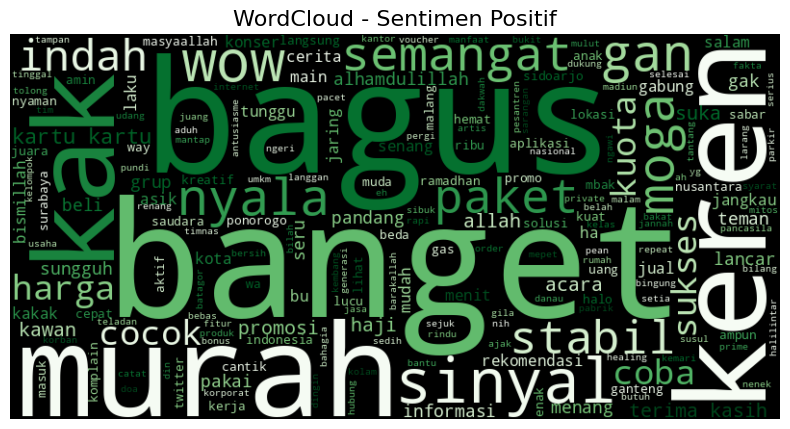

WordCloud untuk Komentar Negatif:


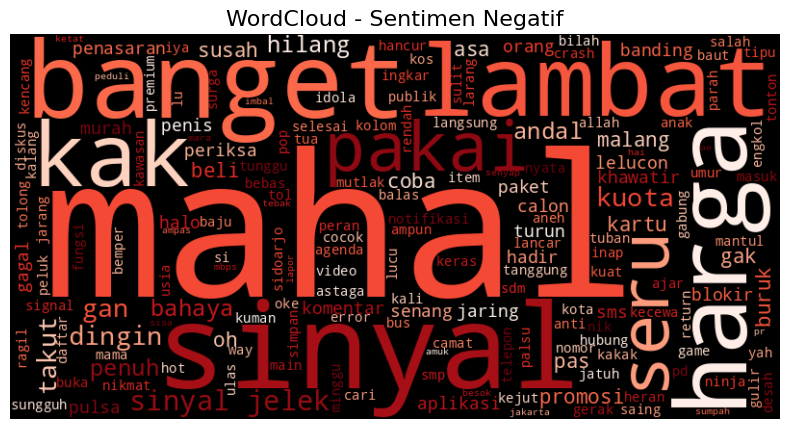

WordCloud untuk Komentar Netral:


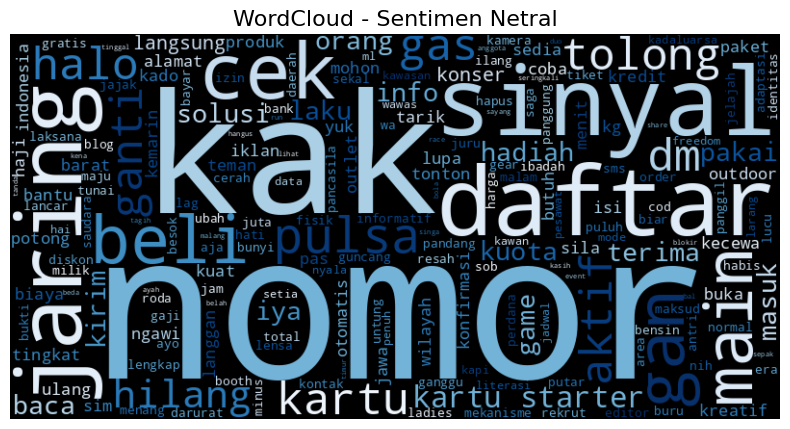

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan teks berdasarkan sentimen
teks_positif = " ".join(komentar_positif['Comment'].astype(str))
teks_negatif = " ".join(komentar_negatif['Comment'].astype(str))
teks_netral = " ".join(komentar_netral['Comment'].astype(str))

# Fungsi untuk membuat WordCloud
def buat_wordcloud(teks, judul, warna):
    # Membuat nama file berdasarkan judul (mengambil kata 'Positif', 'Negatif', 'Netral' dari judul)
    sentimen = judul.split(" ")[-1].lower()  # Mengambil kata terakhir dari judul dan menjadikannya lowercase
    file_name = f"wordcloud_{sentimen}.png"

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="black",
        colormap=warna,
        max_words=200
    ).generate(teks)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(judul, fontsize=16)
    plt.show()

    # Menyimpan gambar hasil WordCloud
    plt.savefig(file_name, bbox_inches="tight")
    plt.close()

# Membuat WordCloud untuk setiap sentimen
print("WordCloud untuk Komentar Positif:")
buat_wordcloud(teks_positif, "WordCloud - Sentimen Positif", "Greens")

print("WordCloud untuk Komentar Negatif:")
buat_wordcloud(teks_negatif, "WordCloud - Sentimen Negatif", "Reds")

print("WordCloud untuk Komentar Netral:")
buat_wordcloud(teks_netral, "WordCloud - Sentimen Netral", "Blues")